In [1]:
import seaborn as sn
from trainer import Trainer
from dataset import DCASE
from CNN import CNN
import torch
from torch.utils.data import DataLoader
from path import Path
import numpy as np

In [3]:
dataset = DCASE(Path('./ADL_DCASE_DATA/evaluation'), 3)
loader = DataLoader(dataset, shuffle=False, batch_size=1)
model = CNN(3, dataset.get_num_clips())

model.load_state_dict(torch.load('./sick_run.pth', map_location=torch.device('cpu')))
# trainer = Trainer(model, None, loader, torch.nn.CrossEntropyLoss(), torch.optim.Adam(model.parameters(), lr=1e-2), None, torch.device('cpu'))

<All keys matched successfully>

In [18]:
def print_per_class_accuracy():
        classes = {0: 'beach',
                   1: 'bus',
                   2: 'cafe/restaurant',
                   3: 'car',
                   4: 'city_center',
                   5: 'forest_path',
                   6: 'grocery_store',
                   7: 'home',
                   8: 'library',
                   9: 'metro_station',
                  10: 'office',
                  11: 'park',
                  12: 'residential_area',
                  13: 'train',
                  14: 'tram'}

        correct_pred = {classname: 0 for classname in classes.keys()}
        incorrect_pred = {classname: {class_n: 0 for class_n in classes.keys()} for classname in classes.keys()}
        total_pred = {classname: 0 for classname in classes.keys()}

        model.eval()
        with torch.no_grad():
            
            validation_results = {
                'loss': [],
                'accuracy': [],
                'preds': [],
                'labels': []
            }
            
            for batch, labels in loader:
                
                logits = model(batch.to(torch.device('cpu')))
                preds = logits.argmax(-1).cpu().numpy()

                for label, pred in zip(labels.cpu().numpy(), preds):
                    if label == pred:
                        correct_pred[label] += 1
                    incorrect_pred[label][pred] += 1
                    total_pred[label] += 1
                    
                validation_results['preds'].extend(list(preds))
                validation_results['labels'].extend(list(labels.numpy()))
                
        validation_results['accuracy'] = compute_accuracy(
            np.array(validation_results["labels"]), 
            np.array(validation_results["preds"])
        )
        
        
        print(validation_results['accuracy'])
                
        
        for classname, correct in correct_pred.items():
            accuracy = 100 * float(correct) / total_pred[classname]
            print("Accuracy for class {:5s} is: {:.1f}%".format(classes[classname], accuracy))
            
        return incorrect_pred
    
def compute_accuracy(
        preds,
        labels
    ) -> float:
        return float((labels == preds).sum()) / len(labels)

In [19]:
out = print_per_class_accuracy()

0.7025641025641025
Accuracy for class beach is: 53.8%
Accuracy for class bus   is: 80.8%
Accuracy for class cafe/restaurant is: 26.9%
Accuracy for class car   is: 100.0%
Accuracy for class city_center is: 96.2%
Accuracy for class forest_path is: 92.3%
Accuracy for class grocery_store is: 92.3%
Accuracy for class home  is: 100.0%
Accuracy for class library is: 7.7%
Accuracy for class metro_station is: 38.5%
Accuracy for class office is: 96.2%
Accuracy for class park  is: 76.9%
Accuracy for class residential_area is: 73.1%
Accuracy for class train is: 38.5%
Accuracy for class tram  is: 80.8%


In [14]:
classes = {0: 'beach',
                   1: 'bus',
                   2: 'cafe/restaurant',
                   3: 'car',
                   4: 'city_center',
                   5: 'forest_path',
                   6: 'grocery_store',
                   7: 'home',
                   8: 'library',
                   9: 'metro_station',
                  10: 'office',
                  11: 'park',
                  12: 'residential_area',
                  13: 'train',
                  14: 'tram'}

class_list = list(classes.values())

lol = np.array([[x for x in y.values()] for y in out.values()])

In [15]:
lol

array([[14,  0,  0,  0,  0,  1,  0,  8,  1,  0,  0,  0,  2,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  7,  0,  0,  0, 15,  2,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 24,  1,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 24,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  2,  1,  0,  0,  0,  5, 10,  2,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0, 25,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0, 20,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  5, 19,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  1,  9,  2,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0

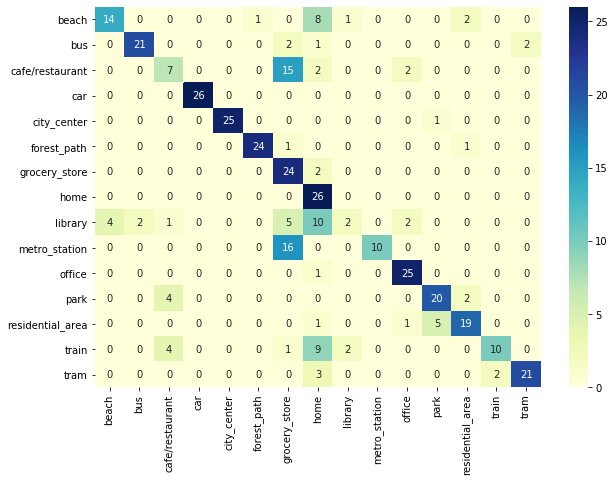

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(lol, index = [i for i in class_list],
                  columns = [i for i in class_list])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")